In [6]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.stem.porter import *
from nltk.tokenize import RegexpTokenizer
import warnings
warnings.filterwarnings("ignore")
import requests 
import zipfile
import pandas as pd

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SLO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SLO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
data = pd.read_csv('../DATA/authors_train.csv')
data

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL
...,...,...,...
19574,id17718,"I could have fancied, while I looked at it, th...",EAP
19575,id08973,The lids clenched themselves together as if in...,EAP
19576,id05267,"Mais il faut agir that is to say, a Frenchman ...",EAP
19577,id17513,"For an item of news like this, it strikes us i...",EAP


In [9]:
# Tokenize: create words from sentences, and removes punctuation
tokenizer = RegexpTokenizer(r'\w+')
data['tokens'] = data.apply(lambda x: tokenizer.tokenize(x['text']), axis = 1)
data

,id,text,author,tokens
0,id26305,"This process, however, afforded me no means of...",EAP,"[This, process, however, afforded, me, no, mea..."
1,id17569,It never once occurred to me that the fumbling...,HPL,"[It, never, once, occurred, to, me, that, the,..."
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,"[In, his, left, hand, was, a, gold, snuff, box..."
3,id27763,How lovely is spring As we looked from Windsor...,MWS,"[How, lovely, is, spring, As, we, looked, from..."
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,"[Finding, nothing, else, not, even, gold, the,..."
...,...,...,...,...
19574,id17718,"I could have fancied, while I looked at it, th...",EAP,"[I, could, have, fancied, while, I, looked, at..."
19575,id08973,The lids clenched themselves together as if in...,EAP,"[The, lids, clenched, themselves, together, as..."
19576,id05267,"Mais il faut agir that is to say, a Frenchman ...",EAP,"[Mais, il, faut, agir, that, is, to, say, a, F..."
19577,id17513,"For an item of news like this, it strikes us i...",EAP,"[For, an, item, of, news, like, this, it, stri..."


In [10]:
# These are the stop words provided by Sklearn
from sklearn.feature_extraction import text

skstop = text.ENGLISH_STOP_WORDS
print(len(skstop), "stop words provided by Sklearn: ")
print()
print(text.ENGLISH_STOP_WORDS)

318 stop words provided by Sklearn: 

frozenset({'un', 'when', 'she', 'hereafter', 'keep', 'their', 'alone', 'somehow', 'sometimes', 'top', 'hasnt', 'there', 'several', 'than', 'here', 'couldnt', 'few', 'yourselves', 'fifty', 'first', 'whither', 'seeming', 'might', 'together', 'was', 'its', 'please', 'be', 'not', 'these', 'somewhere', 'further', 'everywhere', 'been', 'therefore', 'almost', 'de', 'have', 'indeed', 'per', 'very', 'eight', 'nine', 'even', 'become', 'for', 'elsewhere', 'whereafter', 'although', 'hence', 'both', 'third', 'around', 'interest', 'before', 'in', 'it', 'were', 'being', 'most', 'until', 'are', 'if', 'along', 'whereas', 'least', 'behind', 'must', 'see', 'otherwise', 'get', 'themselves', 'whereupon', 'ltd', 'while', 'yourself', 'from', 'beforehand', 'etc', 'full', 'whom', 'what', 'her', 'meanwhile', 'beside', 'system', 'enough', 'many', 'thru', 'fill', 'bill', 'anyone', 'our', 'three', 'still', 'eg', 'next', 'or', 'he', 'below', 'can', 'whereby', 'hereby', 'would',

In [11]:
# These are the stop words provided by nltk, the library we will be using in this example
from nltk.corpus import stopwords
nltkstop = stopwords.words('english')
print(len(nltkstop), "stop words provided by nltk: ")
print()
print(nltkstop)

198 stop words provided by nltk: 

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 

In [12]:
# Remove stop words
data['tokens'] = data['tokens'].apply(lambda x: [item for item in x if item not in nltkstop])
data

,id,text,author,tokens
0,id26305,"This process, however, afforded me no means of...",EAP,"[This, process, however, afforded, means, asce..."
1,id17569,It never once occurred to me that the fumbling...,HPL,"[It, never, occurred, fumbling, might, mere, m..."
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,"[In, left, hand, gold, snuff, box, capered, hi..."
3,id27763,How lovely is spring As we looked from Windsor...,MWS,"[How, lovely, spring, As, looked, Windsor, Ter..."
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,"[Finding, nothing, else, even, gold, Superinte..."
...,...,...,...,...
19574,id17718,"I could have fancied, while I looked at it, th...",EAP,"[I, could, fancied, I, looked, eminent, landsc..."
19575,id08973,The lids clenched themselves together as if in...,EAP,"[The, lids, clenched, together, spasm]"
19576,id05267,"Mais il faut agir that is to say, a Frenchman ...",EAP,"[Mais, il, faut, agir, say, Frenchman, never, ..."
19577,id17513,"For an item of news like this, it strikes us i...",EAP,"[For, item, news, like, strikes, us, coolly, r..."


In [15]:
# Several alternatives for stemming, we are applying SnowballStemmer (less aggresive than others, still with some defects)
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")

data['tokens'] = data['tokens'].apply(lambda x: [stemmer.stem(item) for item in x])
display(data)
data.to_excel("output/data_stemming.xlsx")

,id,text,author,tokens
0,id26305,"This process, however, afforded me no means of...",EAP,"[this, process, howev, afford, mean, ascertain..."
1,id17569,It never once occurred to me that the fumbling...,HPL,"[it, never, occur, fumbl, might, mere, mistak]"
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,"[in, left, hand, gold, snuff, box, caper, hill..."
3,id27763,How lovely is spring As we looked from Windsor...,MWS,"[how, love, spring, as, look, windsor, terrac,..."
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,"[find, noth, el, even, gold, superintend, aban..."
...,...,...,...,...
19574,id17718,"I could have fancied, while I looked at it, th...",EAP,"[i, could, fanci, i, look, emin, landscap, pai..."
19575,id08973,The lids clenched themselves together as if in...,EAP,"[the, lid, clench, togeth, spasm]"
19576,id05267,"Mais il faut agir that is to say, a Frenchman ...",EAP,"[mai, il, faut, agir, say, frenchman, never, f..."
19577,id17513,"For an item of news like this, it strikes us i...",EAP,"[for, item, news, like, strike, us, coolli, re..."


In [16]:
import spacy
nlp = spacy.load("en_core_web_sm")

def lemmatize_spacy(tokens):
    doc = nlp(" ".join(tokens))
    return [token.lemma_ for token in doc]

data['tokens'] = data['tokens'].apply(lemmatize_spacy)
display(data)
data.to_excel("output/data_lemmatization.xlsx")

,id,text,author,tokens
0,id26305,"This process, however, afforded me no means of...",EAP,"[this, process, howev, afford, mean, ascertain..."
1,id17569,It never once occurred to me that the fumbling...,HPL,"[it, never, occur, fumbl, might, mere, mistak]"
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,"[in, left, hand, gold, snuff, box, caper, hill..."
3,id27763,How lovely is spring As we looked from Windsor...,MWS,"[how, love, spring, as, look, windsor, terrac,..."
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,"[find, noth, el, even, gold, superintend, aban..."
...,...,...,...,...
19574,id17718,"I could have fancied, while I looked at it, th...",EAP,"[I, could, fanci, I, look, emin, landscap, pai..."
19575,id08973,The lids clenched themselves together as if in...,EAP,"[the, lid, clench, togeth, spasm]"
19576,id05267,"Mais il faut agir that is to say, a Frenchman ...",EAP,"[mai, il, faut, agir, say, frenchman, never, f..."
19577,id17513,"For an item of news like this, it strikes us i...",EAP,"[for, item, news, like, strike, we, coolli, re..."


Model Creation

In [17]:
# Unify the strings once again
data['tokens'] = data['tokens'].apply(lambda x: ' '.join(x))
data

,id,text,author,tokens
0,id26305,"This process, however, afforded me no means of...",EAP,this process howev afford mean ascertain diman...
1,id17569,It never once occurred to me that the fumbling...,HPL,it never occur fumbl might mere mistak
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,in left hand gold snuff box caper hill cut man...
3,id27763,How lovely is spring As we looked from Windsor...,MWS,how love spring as look windsor terrac sixteen...
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,find noth el even gold superintend abandon att...
...,...,...,...,...
19574,id17718,"I could have fancied, while I looked at it, th...",EAP,I could fanci I look emin landscap painter bui...
19575,id08973,The lids clenched themselves together as if in...,EAP,the lid clench togeth spasm
19576,id05267,"Mais il faut agir that is to say, a Frenchman ...",EAP,mai il faut agir say frenchman never faint out...
19577,id17513,"For an item of news like this, it strikes us i...",EAP,for item news like strike we coolli receiv


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Make split
x_train, x_test, y_train, y_test = train_test_split(
    data['tokens'], 
    data['author'], 
    test_size= 0.2
    )

In [20]:
print("Training data set size: ", len(x_train))
print("Testing data set size: ", len(x_test))

Training data set size:  15663
Testing data set size:  3916


In [21]:
# Create vectorizer
vectorizer = CountVectorizer(
    strip_accents = 'ascii', 
    lowercase = True
    )

# Fit vectorizer & transform it
vectorizer_fit = vectorizer.fit(x_train)
x_train_transformed = vectorizer_fit.transform(x_train)
x_test_transformed = vectorizer_fit.transform(x_test)

In [22]:
x_test_transformed

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 51740 stored elements and shape (3916, 13767)>

In [23]:
# Build the model
from sklearn.naive_bayes import MultinomialNB # Multinomial is adecquate for discrete data (counting of events, for instance)

# Train the model
naive_bayes = MultinomialNB()
naive_bayes_fit = naive_bayes.fit(x_train_transformed, y_train)

In [24]:
from sklearn.metrics import confusion_matrix, balanced_accuracy_score

# Make predictions
train_predict = naive_bayes_fit.predict(x_train_transformed)
test_predict = naive_bayes_fit.predict(x_test_transformed)

def get_scores(y_real, predict):
  ba_train = balanced_accuracy_score(y_real, predict)
  return ba_train

def print_scores(scores):
  return f"Balanced Accuracy: {scores}"

train_scores = get_scores(y_train, train_predict)
test_scores = get_scores(y_test, test_predict)

In [25]:
print("## Train Accuracy")
print(print_scores(f"{train_scores:.2%}"))
print("\n## Test Accuracy")
print(print_scores(f"{test_scores:.2%}"))

## Train Accuracy
Balanced Accuracy: 89.26%

## Test Accuracy
Balanced Accuracy: 83.81%


Confusion Matrix


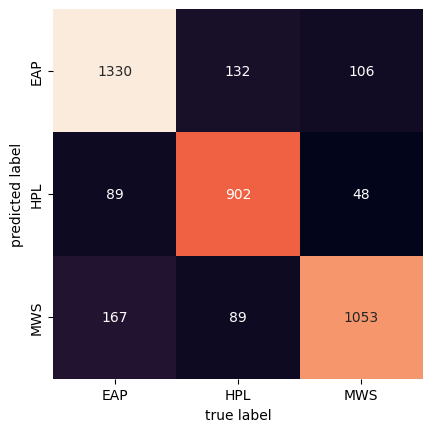

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

print("Confusion Matrix")
mat = confusion_matrix(y_test, test_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=naive_bayes_fit.classes_, yticklabels=naive_bayes_fit.classes_)
plt.xlabel('true label')
plt.ylabel('predicted label');

Model In Practice

In [71]:
data_test = pd.read_csv('../DATA/authors_test.csv')
data_test

,id,text
0,id02310,"Still, as I urged our leaving Ireland with suc..."
1,id24541,"If a fire wanted fanning, it could readily be ..."
2,id00134,And when they had broken down the frail door t...
3,id27757,While I was thinking how I should possibly man...
4,id04081,I am not sure to what limit his knowledge may ...
...,...,...
8387,id11749,All this is now the fitter for my purpose.
8388,id10526,I fixed myself on a wide solitude.
8389,id13477,It is easily understood that what might improv...
8390,id13761,"Be this as it may, I now began to feel the ins..."


In [72]:
# Tokenize: create words from sentences, and removes punctuation
tokenizer = RegexpTokenizer(r'\w+')
data_test['tokens'] = data_test.apply(lambda x: tokenizer.tokenize(x['text']), axis = 1)
data_test

,id,text,tokens
0,id02310,"Still, as I urged our leaving Ireland with suc...","[Still, as, I, urged, our, leaving, Ireland, w..."
1,id24541,"If a fire wanted fanning, it could readily be ...","[If, a, fire, wanted, fanning, it, could, read..."
2,id00134,And when they had broken down the frail door t...,"[And, when, they, had, broken, down, the, frai..."
3,id27757,While I was thinking how I should possibly man...,"[While, I, was, thinking, how, I, should, poss..."
4,id04081,I am not sure to what limit his knowledge may ...,"[I, am, not, sure, to, what, limit, his, knowl..."
...,...,...,...
8387,id11749,All this is now the fitter for my purpose.,"[All, this, is, now, the, fitter, for, my, pur..."
8388,id10526,I fixed myself on a wide solitude.,"[I, fixed, myself, on, a, wide, solitude]"
8389,id13477,It is easily understood that what might improv...,"[It, is, easily, understood, that, what, might..."
8390,id13761,"Be this as it may, I now began to feel the ins...","[Be, this, as, it, may, I, now, began, to, fee..."


In [73]:
# Several alternatives for stemming, we are applying SnowballStemmer (less aggresive than others, still with some defects)
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")

data_test['tokens'] = data_test['tokens'].apply(lambda x: [stemmer.stem(item) for item in x])
display(data_test)
data_test.to_excel("output/new_data_stemming.xlsx")

,id,text,tokens
0,id02310,"Still, as I urged our leaving Ireland with suc...","[still, as, i, urg, our, leav, ireland, with, ..."
1,id24541,"If a fire wanted fanning, it could readily be ...","[if, a, fire, want, fan, it, could, readili, b..."
2,id00134,And when they had broken down the frail door t...,"[and, when, they, had, broken, down, the, frai..."
3,id27757,While I was thinking how I should possibly man...,"[while, i, was, think, how, i, should, possibl..."
4,id04081,I am not sure to what limit his knowledge may ...,"[i, am, not, sure, to, what, limit, his, knowl..."
...,...,...,...
8387,id11749,All this is now the fitter for my purpose.,"[all, this, is, now, the, fitter, for, my, pur..."
8388,id10526,I fixed myself on a wide solitude.,"[i, fix, myself, on, a, wide, solitud]"
8389,id13477,It is easily understood that what might improv...,"[it, is, easili, understood, that, what, might..."
8390,id13761,"Be this as it may, I now began to feel the ins...","[be, this, as, it, may, i, now, began, to, fee..."


In [74]:
import spacy
nlp = spacy.load("en_core_web_sm")

def lemmatize_spacy(tokens):
    doc = nlp(" ".join(tokens))
    return [token.lemma_ for token in doc]

data_test['tokens'] = data_test['tokens'].apply(lemmatize_spacy)
display(data_test)
data_test.to_excel("output/new_data_lemmatization.xlsx")

,id,text,tokens
0,id02310,"Still, as I urged our leaving Ireland with suc...","[still, as, I, urg, our, leav, ireland, with, ..."
1,id24541,"If a fire wanted fanning, it could readily be ...","[if, a, fire, want, fan, it, could, readili, b..."
2,id00134,And when they had broken down the frail door t...,"[and, when, they, have, break, down, the, frai..."
3,id27757,While I was thinking how I should possibly man...,"[while, I, be, think, how, I, should, possibl,..."
4,id04081,I am not sure to what limit his knowledge may ...,"[I, be, not, sure, to, what, limit, his, knowl..."
...,...,...,...
8387,id11749,All this is now the fitter for my purpose.,"[all, this, be, now, the, fitter, for, my, pur..."
8388,id10526,I fixed myself on a wide solitude.,"[I, fix, myself, on, a, wide, solitud]"
8389,id13477,It is easily understood that what might improv...,"[it, be, easili, understand, that, what, might..."
8390,id13761,"Be this as it may, I now began to feel the ins...","[be, this, as, it, may, I, now, begin, to, fee..."


In [75]:
# Unify the strings once again
data_test['tokens'] = data_test['tokens'].apply(lambda x: ' '.join(x))
data_test

,id,text,tokens
0,id02310,"Still, as I urged our leaving Ireland with suc...",still as I urg our leav ireland with such inqu...
1,id24541,"If a fire wanted fanning, it could readily be ...",if a fire want fan it could readili be fan wit...
2,id00134,And when they had broken down the frail door t...,and when they have break down the frail door t...
3,id27757,While I was thinking how I should possibly man...,while I be think how I should possibl manag wi...
4,id04081,I am not sure to what limit his knowledge may ...,I be not sure to what limit his knowledg may e...
...,...,...,...
8387,id11749,All this is now the fitter for my purpose.,all this be now the fitter for my purpos
8388,id10526,I fixed myself on a wide solitude.,I fix myself on a wide solitud
8389,id13477,It is easily understood that what might improv...,it be easili understand that what might improv...
8390,id13761,"Be this as it may, I now began to feel the ins...",be this as it may I now begin to feel the insp...


In [76]:
x = data_test['tokens']

In [77]:
# Transform the new dataset
new_data_transformed = vectorizer.transform(x)  # Adjust based on your feature processing

# Make predictions
new_predictions = naive_bayes_fit.predict(new_data_transformed)

# Print predictions
print(new_predictions)

ValueError: X has 10868 features, but MultinomialNB is expecting 13767 features as input.

In [35]:
test_predict = naive_bayes_fit.predict(x_test_transformed)

def get_scores(y_real, predict):
  ba_train = balanced_accuracy_score(y_real, predict)
  return ba_train

def print_scores(scores):
  return f"Balanced Accuracy: {scores}"

train_scores = get_scores(y_train, train_predict)
test_scores = get_scores(y_test, test_predict)

ValueError: X has 17539 features, but MultinomialNB is expecting 13767 features as input.